In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ('C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/jma_nitrate.csv', sep=',')
data.columns

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16221 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16221 non-null  int64  
 1   theta       16221 non-null  float64
 2   sal         16221 non-null  float64
 3   depth       16221 non-null  int64  
 4   nitrate     16221 non-null  float64
 5   lon         16221 non-null  float64
 6   lat         16221 non-null  float64
 7   date        16221 non-null  object 
 8   year        16221 non-null  float64
 9   month       16221 non-null  float64
 10  day         16221 non-null  float64
 11  profile     16221 non-null  float64
 12  cruise      16221 non-null  object 
 13  vessel      16221 non-null  object 
 14  density     16221 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data.isna().sum()

Unnamed: 0    0
theta         0
sal           0
depth         0
nitrate       0
lon           0
lat           0
date          0
year          0
month         0
day           0
profile       0
cruise        0
vessel        0
density       0
dtype: int64

In [5]:
data = data[data['nitrate']>0]

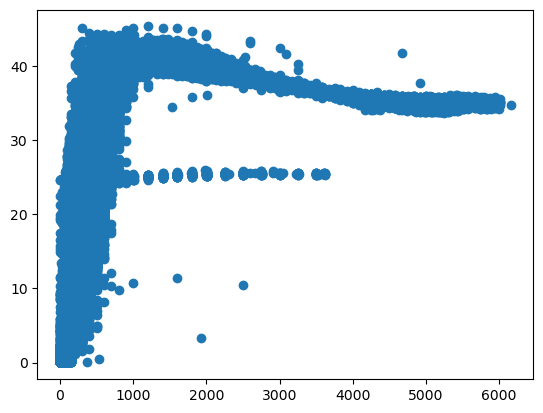

In [6]:
plt.plot(data.depth, data.nitrate, 'o')

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.neural_network import MLPRegressor

In [8]:
y = data.nitrate
X = data[['density', 'depth']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [9]:
len(X_test)

3115

In [12]:
n  = int(input('Choose a number for hidden nodes: '))

X = pd.DataFrame([10 * random.random() for __ in range(50)])
y = 2 * X - 1 + pd.DataFrame([random.random() for __ in range(50)])

Choose a number for hidden nodes: 5


In [13]:
model = MLPRegressor(hidden_layer_sizes=(n,),
                     activation='relu', max_iter=10000)
model.fit(X_train, y_train)

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(5,), max_iter=10000)

In [14]:
# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(X,y)))

R^2 score: 0.99


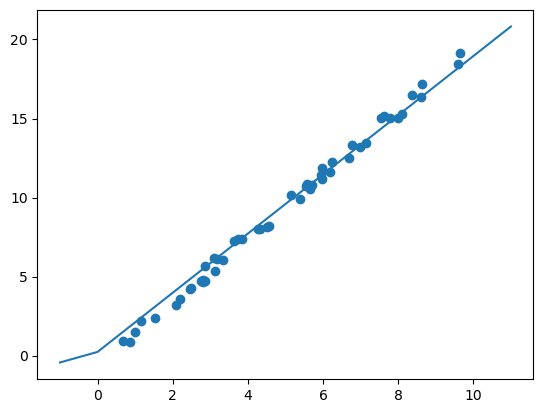

In [15]:
# plot the model together with the data
Xfit = pd.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(Xfit, yfit)
plt.show()

In [45]:
print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test, y_pred)))

r2 = 0.8063074540825313
MSE = 46.11248168501681
RMSE = 6.7906171799783275
